In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image


In [2]:
fp_orignal_images = "./input/218/test/original/"
fp_original_images_grey = "./input/218/test/grey/"
fp_unpadded_pretrained = "./unpadded/gan/output_untrained/"
fp_unpadded_100 = "./unpadded/gan/output_100"
fp_unpadded_1000 = "./unpadded/gan/output_1000"
fp_unpadded_2500 = "./unpadded/gan/output_2500"

# Load first image from each folder
idx = 0
original_image = Image.open(os.path.join(fp_orignal_images, os.listdir(fp_orignal_images)[idx]))
original_image_grey = Image.open(os.path.join(fp_original_images_grey, os.listdir(fp_original_images_grey)[idx]))
unpadded_pretrained = Image.open(os.path.join(fp_unpadded_pretrained, os.listdir(fp_unpadded_pretrained)[idx]))
unpadded_100 = Image.open(os.path.join(fp_unpadded_100, os.listdir(fp_unpadded_100)[idx]))
unpadded_1000 = Image.open(os.path.join(fp_unpadded_1000, os.listdir(fp_unpadded_1000)[idx]))
unpadded_2500 = Image.open(os.path.join(fp_unpadded_2500, os.listdir(fp_unpadded_2500)[idx]))


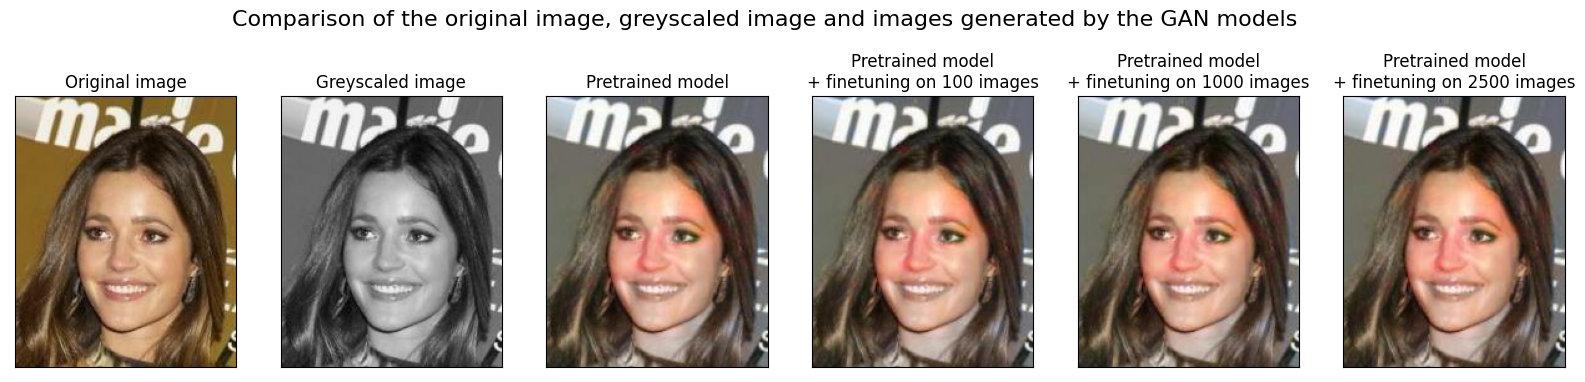

In [3]:
# Make plot with the original image, greyscaled image, image with the 100, 1000 and 2500 model

fig, axs = plt.subplots(1, 6, figsize=(20, 4), sharey=True, sharex=True)
fig.suptitle("Comparison of the original image, greyscaled image and images generated by the GAN models", fontsize=16, y=1.05)

axs[0].imshow(original_image)
axs[0].set_title("Original image")
axs[1].imshow(original_image_grey, cmap="gray")
axs[1].set_title("Greyscaled image")
axs[2].imshow(unpadded_pretrained)
axs[2] .set_title("Pretrained model")
axs[3].imshow(unpadded_100)
axs[3].set_title("Pretrained model\n+ finetuning on 100 images")
axs[4].imshow(unpadded_1000)
axs[4].set_title("Pretrained model\n+ finetuning on 1000 images")
axs[5].imshow(unpadded_2500)
axs[5].set_title("Pretrained model\n+ finetuning on 2500 images")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


In [10]:

import json

fp_jsons = "./results/gan/"
jsons = [os.path.join(fp_jsons, file) for file in os.listdir(fp_jsons)]

# Add all results together in dict, with the model name as key
results = {}
for file in jsons:
    with open(file, "r") as f:
        results[file.split("/")[-1].split(".")[0]] = json.load(f)

results.keys()


dict_keys(['100', '1000', '2500', 'untrained'])

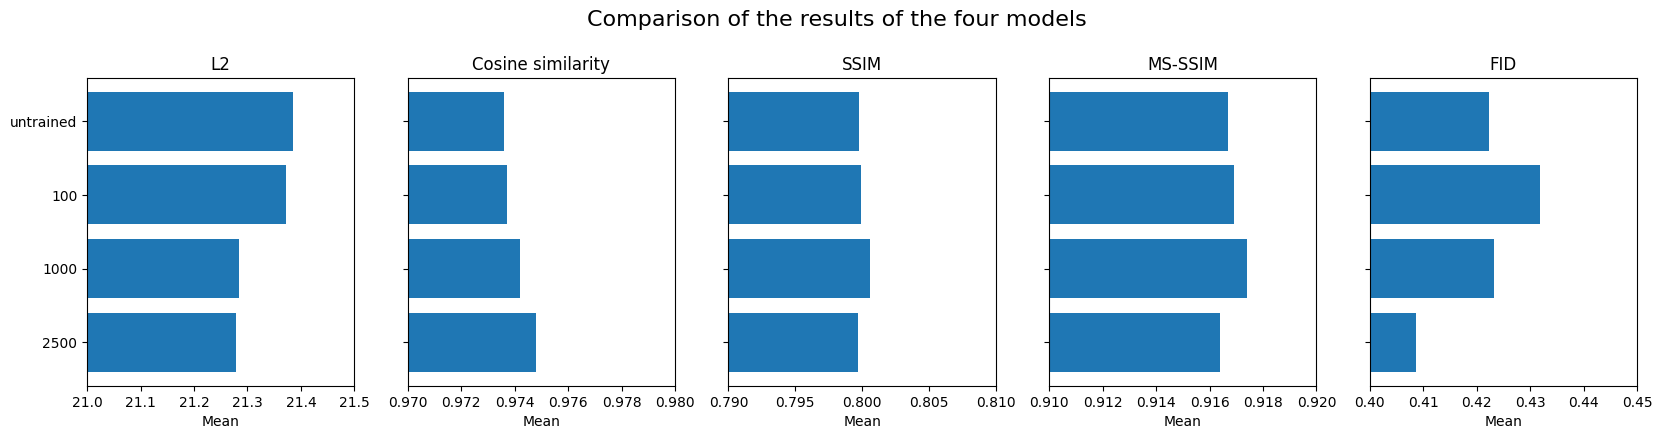

In [83]:
# Plot the results of the four models, based on their JSONs

fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fig.suptitle("Comparison of the results of the four models", fontsize=16, y=1.05)

# Barplots
data_l2 = list(zip(*sorted(((key, value["L2"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[0].barh(data_l2[0], data_l2[1])

data_cosine_similarity = list(zip(*sorted(((key, value["cosine_similarity"]["mean"])
                              for (key, value) in results.items()), key=lambda x: x[1])))
axs[1].barh(data_cosine_similarity[0], data_cosine_similarity[1])

data_ssim = list(zip(*sorted(((key, value["SSIM"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[2].barh(data_ssim[0], data_ssim[1])

data_ms_ssim = list(zip(*sorted(((key, value["MS-SSIM"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[3].barh(data_ms_ssim[0], data_ms_ssim[1])

data_fid = list(zip(*sorted(((key, value["FID"]["mean"]) for (key, value) in results.items()), key=lambda x: x[1])))
axs[4].barh(data_fid[0], data_fid[1])

axs[0].set_title("L2")
axs[1].set_title("Cosine similarity")
axs[2].set_title("SSIM")
axs[3].set_title("MS-SSIM")
axs[4].set_title("FID")

for ax in axs:
    ax.set_xlabel("Mean")

# Set xlims
axs[0].set_xlim(21, 21.5)
axs[1].set_xlim(0.97, 0.98)
axs[2].set_xlim(0.79, 0.81)
axs[3].set_xlim(0.91, 0.92)
axs[4].set_xlim(0.4, 0.45)

plt.show()